In [1]:
from BPTK_Py import bptk
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd
import math

In [2]:
bptk = bptk()

# Define the model

A model of a pond fed by a seasonal stream, subject to evaporation, that overflows at a certain level

In [3]:
model = Model(starttime=1.0, stoptime=730.0, dt=1.0, name='Watershed')

In [4]:
overflow_level = model.constant('overflowLevel')
overflow_level.equation = 2.0
pond = model.stock('pond')
pond.initial_value = 1.0

In [5]:
inflow = model.flow('inflow')
inflow.equation = 0.2 * (1.0 - sd.cos(6.283 * sd.time() / 365.0))
evaporation = model.flow('evaporation')
evaporation.equation = 0.02 * pond
excess_volume = model.converter('excessVolume')
excess_volume.equation = pond - overflow_level
outflow = model.flow('outflow')
outflow_rate = model.converter('outflowRate')
outflow_rate.equation = excess_volume
outflow.equation = sd.If((excess_volume > 0.0), outflow_rate, 0.0)

In [6]:
pond.equation = inflow - outflow - evaporation

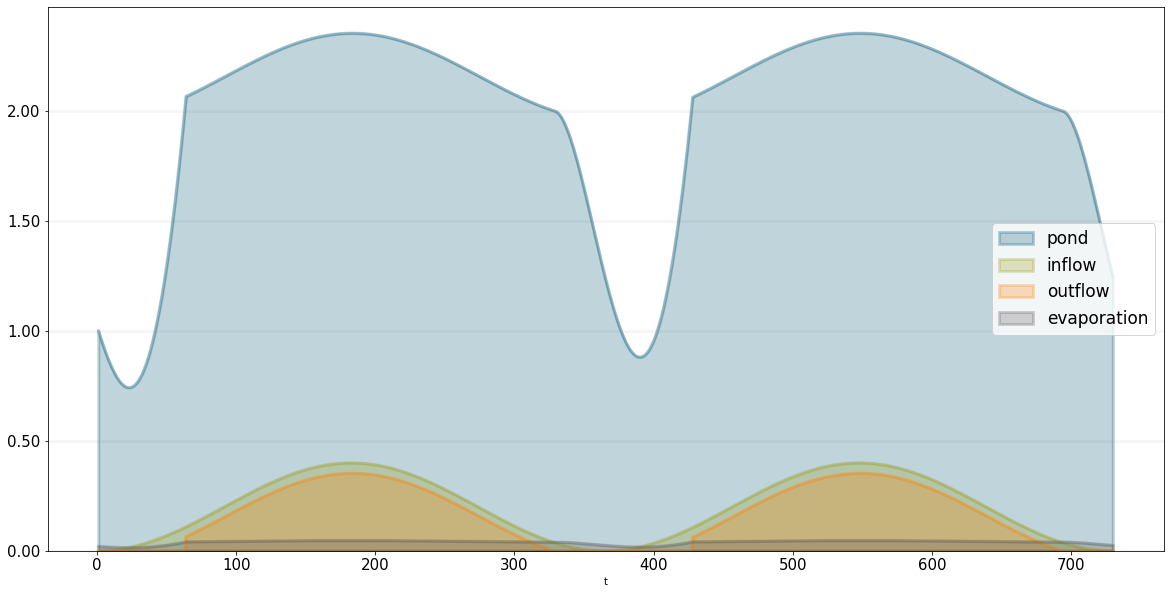

In [7]:
bptk.register_model(model)
bptk.plot_scenarios(scenario_managers=['smWatershed'],
                    scenarios=['base'],
                    equations=['pond', 'inflow', 'outflow', 'evaporation'])

# Visualise the model - interactive

In [8]:
import sdmdlvis as mv
from pyvis.network import Network

# create a NetworkX graph from the BPTK model
mg = mv.model_graph(model)
# create a PyVis visualisation
nt = Network('400px', '100%',
             directed=True,
             notebook=True,
             cdn_resources='in_line')
# populate the visualisation from the graph of the BPTK model
nt.from_nx(mg)

# display
print('Interactive visualisation - pan & zoom, drag nodes, and hover for equations')
#nt.toggle_physics(False)
#nt.show_buttons()
nt.show('nx.html')

Interactive visualisation - pan & zoom, drag nodes, and hover for equations
nx.html


# Visualise the model - static

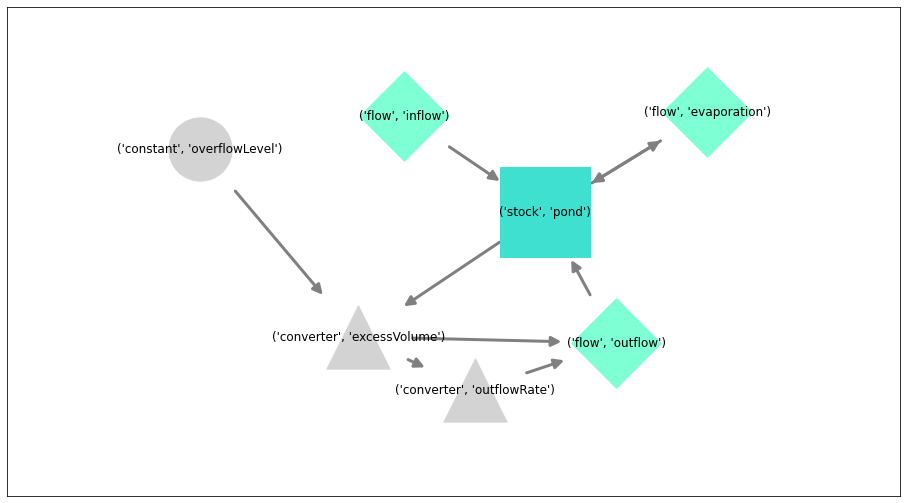

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.gca().margins(0.3)
mv.draw_model_graph(model, ax=plt.gca(), eqn=False)
plt.show()

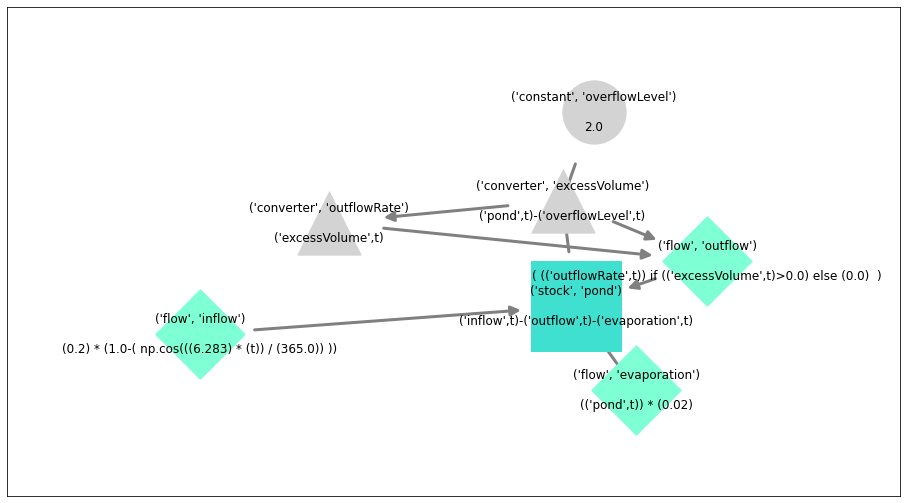

In [10]:
plt.figure(figsize=(16, 9))
plt.gca().margins(0.3)
mv.draw_model_graph(model, ax=plt.gca(), eqn=True)
plt.show()